### TP3

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

* (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
* (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1
* (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.

## Punto 1:

In [2]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
# template_path = os.path.join(base_path, 'template', 'pattern.png')
images = os.listdir('images')
single_image = [i for i in images if i != 'coca_multi.png']
template = 'template/pattern.png'


Estos valores de factor de escala y de threshold, los encontré probando con cada imagen. 

In [4]:
scale_factors = [0.9,0.2,0.4,0.55,0.75,0.85]
threshold = [0.085,0.2,0.13,0.125,0.1,0.038]

In [5]:
def detecting_logos(template, image, scales , threshold): 

    image = cv.imread(f'images/{image}')
    img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    edges_image = cv.Canny(img, 150, 200)

    template = cv.imread(template)
    gray_template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    edges_template = cv.Canny(gray_template, 50, 200)

    image_height, image_width = edges_image.shape[:2]
    template_height, template_width = edges_template.shape[:2]

    scale_factor = image_width / template_width

    edges_template = cv.resize(edges_template, (int(template_width * scale_factor), int(template_height * scale_factor)))

    scaled_template = cv.resize(edges_template, None, fx=scales, fy=scales)

    result = cv.matchTemplate(edges_image, scaled_template, cv.TM_CCOEFF_NORMED)
    
    # Encontrar las ubicaciones donde la coincidencia supera el umbral
    loc = np.where(result >= threshold)
    
    # Dibujar rectángulos alrededor de las coincidencias encontradas
    for pt in zip(*loc[::-1]):
        cv.rectangle(image, pt, (pt[0] + scaled_template.shape[1], pt[1] + scaled_template.shape[0]), (0, 255, 0), 2)

    return image



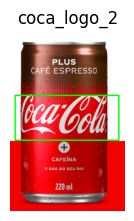

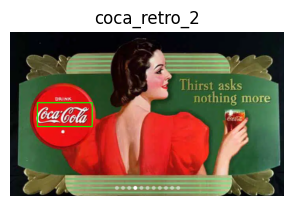

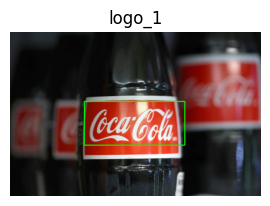

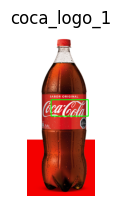

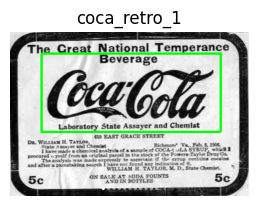

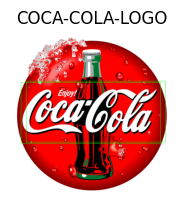

In [6]:

for i in range(6):
 logo = detecting_logos(template, single_image[i],scale_factors[i], threshold[i])
 plt.figure(figsize=(12,12))
 plt.subplot(6, 1, i + 1)
 plt.title(f"{single_image[i].split('.')[0]}")
 #plt.imshow(logo) 
 plt.imshow(cv.cvtColor(logo, cv.COLOR_BGR2RGB))  # Convertir BGR a RGB para matplotlib
 plt.axis('off')

 plt.tight_layout()
 plt.show()

   

## Punto 2:

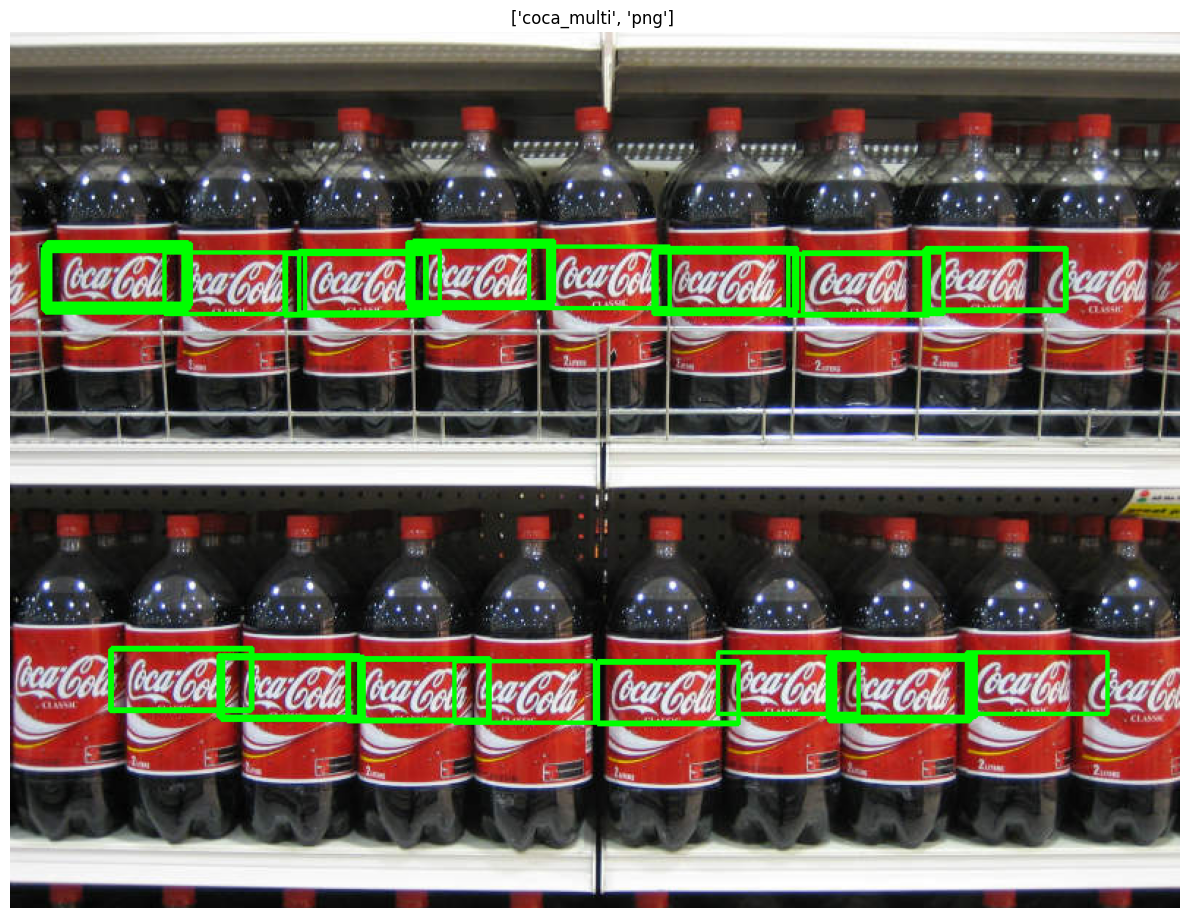

In [7]:
logos = detecting_logos(template, 'coca_multi.png',0.12,0.12 )
plt.figure(figsize=(12,12))
 # plt.subplot(6, 1, i + 1)
plt.title(f"{'coca_multi.png'.split('.')} ")
 #plt.imshow(logo) 
plt.imshow(cv.cvtColor(logos, cv.COLOR_BGR2RGB))  # Convertir BGR a RGB para matplotlib
plt.axis('off')

plt.tight_layout()
plt.show()